# Single Cell and Spatial Transcriptomics Analysis

### JAX Sleep-AD Short Course, October 2022

#### Bill Flynn, Associate Director Single Cell Biology, JAX
#### bill.flynn@jax.org



## Outline

- (Skippable as there were multiple talks regarding bulk RNA-seq) 
    - Recap of RNA-seq.  Why do you do it.
    - History of cell definitions
    - History of isolating single cells
- Simpson's paradox.  Case study of when RNA-seq leads to problems at single cell resolution.
- General overview of scRNA-seq (reads -> align -> matrix -> analysis)
- Recent history of scRNA-seq methods
- Importance of UMIs
- Explanation of 10X genomics
- Structure of reads/bams
- Sparsity, dropout, etc.
- How do call cells
- Metrics of quality
- How does one go about analyzing a matrix?  What decisions are made?
    - Cell quality, what is good, what is bad, how does one filter out bad?
    - Normalization, why and how?
    - Dimesionality reduction -> why?
        - PCA and scaling
        - t-SNE
        - UMAP and nearest-neighbor embeddings
        - How to judge what's good and bad?
    - Clustering
        - General problems
        - Different ways to do it and benefits/downsides of each
    - Marker Gene identification
- One major limitation of single cell technologies is missing spatial information.
- Microscopy?

## Workshop Goals

1. Understand the technologies and analysis methods available in the single cell field to critically examine publications.
2. Understand the **challenges** these methods face.  A good review: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1926-6
2. For single cell RNA sequencing:
    - Understand the analysis decisions and common pitfalls involved with typical experiments
    - Know where to start and what tools are available if you are faced with analysis of this data.

## Workshop Structure

1. History lesson
2. Overview of Single cell RNA-sequencing 
3. Current technologies
4. Analysis workshop
5. Other single cell technologies

Slides available at: https://wflynny.github.io/MEDS6498-2020/

## What is a cell?
>That there is one universal principle of development for the elementary part of organisms, however different, and that this principle is the formation of cells. 

_Microscopical researches into the accordance in the structure and growth of animals and plants_
Theodor Schwann (1810--1882)

<!--<img src="img/Theodor_Schwann_Litho.jpg" width="25%">-->

## Understanding what makes a cell a cell

One of the major goals of Cell Biology has been to uncover and characterize the diverse set of cells that are life's building blocks.

For a long time, this was done manually with microscopes.

<img src="img/Wilson1900Fig2.jpg" width="50%">

## Early cataloging of retina cells, Ramon y Cajal
<img src="img/Cajal2.jpg" width="50%" rotation=90/>


## Advancements in multiple areas improved ability to describe cells

- Molecular biology --> improvements in isolation and dissociation
    - enzymes, laboratory techniques
    - discovery of DNA, RNA
- Microscopy --> better morphological descriptions and throughput

### More recent advancements have led to more ways to describe cells:
- Sequencing allows us to characterize both interior and exterior of cells
- Microfluidic valves and droplets dramatically increase the throughput with which to capture and probe individual cells

## Many sizes, shapes, functions

<img src="img/paul_cells.smaller.png"/>

## This functional, morphological, and spatial heterogeneity implies heterogeneity within and between types of cells

## How do we profile single cells?
<img src="img/bowl-of-fruit.jpg">

## Started by micropipetting individual cells

<img src="img/micropipetting.png">

Extremely labor-intensive, yielding on the order of a dozen cells.

This was _the only_ process up until about 50 years ago, and is still utilized today.

## Then graduated to flow cytometry

<img src="img/flow-cytometry.png" width="60%"/>

Available since the 1970s.  Currently 28 fluorescent probes or 40 mass spectrometry-based probes available.

# How to increase the measurable set of features?

<img src="img/fruit-features.png" width="80%">

In order to profile cells more deeply, we must explore the properties that define a cell from the _inside_.

# The transcriptome defines a cell


## A Cell’s Function is Determined By the Repertoire of Genes It Expresses


## Characterization of a cell from the inside

- Each cell type expresses a specific fraction of genes, these define its function.
- ~15,000--150,000 mRNA molecules per cell
- Levels of gene-specific mRNA expression are characteristic of cell type (i.e. not just binary on/off)

## Single Cell Transcriptomics _is_ Cell Biology

# With the genome sequenced and annotated, we can define the unknown

- Limited set of genes (~30,000) to define all cell types in the human and mouse genome

- Unique combinations of these genes will define all cell types

- Single cell transcriptomics thus provides an unbiased approach to define all cell types

- Defining the transcriptomes of individual cell types will provide insight into this cell’s function

- Identify rare or unknown cells

<img src="img/rare-fruits.png" width="50%">

# Can't we just use bulk RNA-seq to understand cellular makeup?

<img src="img/fruit-smoothie.jpg" width="48%">

# Signals about cellular makeup from bulk RNA-seq can be misleading

<img src="img/simpsons-paradox.gif" width="75%">

# An example: molecular subtypes of glioblastoma

Bulk gene signatures define 4 molecular subtypes in GBM.

<img src="img/verhaak2010.jpg">

[_Verhaak et al **Cancer Cell** 2010_](https://linkinghub.elsevier.com/retrieve/pii/S1535610809004322)

# An example: molecular subtypes of glioblastoma

<img src="img/patel2014.png" width="60%">

When applied to the single cell transcriptomes of 5 patients, tumors are made up of a mix of cells from each subtype.  
Some cells even express multiple subtype signatures.

[_Patel et al. **Science** 2014_](http://science.sciencemag.org/content/344/6190/1396.full)

# How is high throughput sequencing of single cells done?

# Overview scRNA-seq workflow

<img src="img/workflow.png">

# The first step is isolating cells from one another.

# First generation microfluidics - Fluidigm C1

<img src="img/c1chip.png">

Captures up to 96 cells on a chip.

# Exponentional scaling of single cell gene expression methods
<img src="img/exponential_scaling_extended.png"/>
_adapted from [Svensson, Vento-Tormo, & Teichmann 2018 Nature Protocols](https://doi.org/10.1038/nprot.2017.149)_

# Droplet-based technologies enable thousands of cells to be sequenced


## Capture of cells in 1nL droplets

<video controls="controls">
<source src="img/mmc4.mp4" type="video/mp4">
</video>

Gel beads contain reagents for transcript capture and reverse transcription for cDNA creation.

Major challenge: conquering double-Poisson loading of droplets. 

Solution: severely limit the number of cells versus reagents.  Leads to fewer "multiplets" but a lot of empty droplets and wasted reagents.

# 10X Genomics Chromium System

<img src="img/datlinger1.png">

_Datlinger et al. Nat Methods 2021, 10.1038/s41592-021-01153-z_

- Gel bead in Emulsion (GEM)
- High GEM fill ratio (~90% of droplets contain beads)
- Poisson Loading of Cells in GEMs
- Beads dissolve for efficient, liquid phase biochemistry
- Cell lysis starts immediately following encapsulation
- Up to 8 channels/samples processed in parallel
- Up to 6,000 cells/channel, 48,000 cells/chip 
- ~50% cell processing efficiency

# Zoomed in

<img src="img/handdrawn.png">

<img src="img/handdrawn2.png">

<img src="img/3pgex.png" width=50%>

# Other current technologies are similar

<img src="img/indrop.jpg">
<img src="img/split-seq.png" width="50%">

# Transcripts from each cell are labeled with a unique, cell-specific barcode
<img src="img/splitandpool.png">

## Each transcript is labeled with a randomized barcode

Unique Molecular Identifier (UMI) which help control PCR amplification bias.

## Each molecule from all cells has a unique (cell barcode, UMI) pair, allowing them to be pooled together for sequencing.

# During sequencing, paired end reads are used to capture these barcodes and the mRNA transcript

Sequencing with asymmetric paired-end reads. 1 short technical read, 1 longer biological read.

# 
<img src="img/read1-new.png">

#
<img src="img/read2-new.png">

Carries some fragment of the transcript.  In this case, it's the 3' end.

## Sequencing asymmetrically saves money and improves sequencing quality

<img src="img/async-sequencing.png">

# From this point, it's all informatics


Reads -> Cell x Gene count matrix -> Insights

## Typical processing pipeline

<img src="img/pipeline.png">

This is the 10X Genomics "CellRanger" pipeline, but there are alternatives that all do roughly the same thing:

- [CellRanger](https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/what-is-cell-ranger)
- [DropSeqTools](https://github.com/broadinstitute/Drop-seq/releases)
- [Salmon Alevin](https://salmon.readthedocs.io/en/latest/alevin.html)
- [Kallisto Bustools](https://www.kallistobus.tools/)
- [STARsolo](https://github.com/alexdobin/STAR/blob/master/docs/STARsolo.md)

# Reads are aligned

<img src="img/bam2.png">

# De-duplicating UMIs
<img src="img/umis1.png" width="30%">

# Distinguishing cell from barcodes

<img src="img/rank-plots" width="60%"/>


# Common cell-calling distribution
<img src="img/summary-stats.png" width="80%">

# Yields a _digital_ expression matrix

<img src="img/umi-counting.png" width="70%">

# However, this matrix is extremely sparse

<img src="img/ZerosIn10XData.png" width="50%">

Overcoming this sparsity is a major challenge in the field bioinformatically and from an assay development perspective.

# That said, scRNA-seq data is **not** well-described by a zero-inflated negative binomial distribution

<img src="img/not-zero-inflated.png">

_Svennson 2020 Nature Biotech 10.1038/s41587-019-0379-5_

# Analysis overview

## Going from matrix to insights

The goal of every scRNA-seq experiment is to characterize the heterogeneity of cell types (and within cell types) within the sample population sequenced.

This analytical process typically involves the following steps:

- Filtering low quality cells
- Filtering really sparsely expressed genes
- Normalize gene expression
- Feature selection for clustering
- Dimensionality reduction
- Cluster identification
- Marker gene identification
- Cell type inference

Each of these steps involves making choices that affect downstream processing.

# Faced with challenges

How to...
- discriminate lowly expressing cells from ambient mRNA?
- reliably call expressed genes?
- cluster cells without bias?
- identify cell types without clustering?
- infer celltypes from marker genes? without biological insight?

# Philosophical challenges
- How to define a "cell type"?
- Do cells that cluster together always belong to the same "type"?

# How variable is the data

<img src="img/GenesvsReads.png" width="70%">

- Low quality cells with `<250` genes per cell
- (sub)linear relationship between sequencing depth and genes detected per cell

# Normalization

The number of transcripts captured and subsequent reads generated in each cell is stochastic.  It is common to correct for that using _Library size_ normalization which divides the counts of each gene in a cell by that cell's total UMI count (the library size).  Counts are then often multiplied by a scaling factor.

$\mbox{counts}_{cell_i, gene_j}^{norm} = \frac{\mbox{counts}_{cell_i, gene_j}}{\sum_{gene_j} \mbox{counts}_{cell_i, gene_j}} * \mbox{scaling_factor}$


Options for this scaling factor are:

- 1,000,000 (resultant is counts per million (CPM))
- the median library size across cells
- literally any arbitrary number (like 10,000 or 2^14)

Additionally, we can account for any variation in the variance of genes (highly expressed genes have higher variance in expression) by performing a sublinear transform (like `log` or `sqrt`) to make the variances more normally distributed.

$\log (\mbox{counts}_{cell_i, gene_j}^{norm} + 1)$


# Dimensionality reduction

Even after filtering, many genes (typically ~10,000 - 15,000) remain expressed in at least a few cells.  This is a very large multi-dimensional space.

Effective analysis in spaces with more than a few hundred dimensions is difficult (Curse of Dimensionality). In particular, distances between points tend toward uniformity, making finding clusters or determining differences challenging.

What is the best way to proceed?

# Gene selection

Perhaps the most important step in single cell transcriptome analysis is to select which subset of genes is used to represent the original high dimensional space of the data.  This greatly affects the outcome of dimensionality reduction. 

Some common ways:

- All expressed genes after filters (~15,000)
- Filter genes expressed in > 95% of cells and < 5% of cells
- Top variable genes
- Overdispersed genes (ratio of variance to mean)
- Highly expressed in 1 cell

# First step - Principal Component Analysis

<img src="img/pca.png">

[_Martin Hemberg's scRNA-seq course_](https://hemberg-lab.github.io/scRNA.seq.course/index.html)

# PCA on raw counts:

<img src="img/raw.png" width="50%">

# PCA on normalized counts

<img src="img/cpm.png" width="50%">

# Using high variance genes

<img src="img/tsneVar.png" width="40%">

# Using high dispersion genes

<img src="img/tsneDisp.png" width="40%">

# Second step - manifold embeddings

Unlike PCA where it's up to you to determine how many components are important, t-distributed Stochastic Neighbor Embedding (t-SNE) and Uniform Manifold Approximation and Projection (UMAP) project data from the high dimensional space into 2 or 3 dimensions preserving notion of "closeness".

<img src="img/manifold.png">

[_Becht et al. Nat Biotech 2019_](https://www.nature.com/articles/nbt.4314)

# Clustering

No gold standard method currently and field is searching for best practice.

Typical options are:
- Spectral clustering or kNN clustering in PCA space.
- Consensus or heirarchical clustering in PCA space.
- Density-based cluster in PCA or t-SNE/UMAP space.
- Constructing a graph/network and using community detection algorithms to assign clusters.

# Cluster identification

Once clusters have been assigned, now it's time to return to biology.  Usually clusters are assigned a cell type or cell state through the use of biomarker genes.  This is done by
- manual curation
    - knowledge of genes expressed cell type markers from bulk RNA-seq or your biology training
    - assign labels by plotting the gene expression of those genes by cluster and iteratively refining your labels
- supervised analysis
    - use many statistical tests to find gene expression that is specific to one cluster (similar to bulk differential expression analysis)
    - still often requires looking up genes in a database or the literature to associate cell types with gene expression

# For example, where are the B Cells?
<img src="img/tsne.png" width="40%">
<img src="img/bcell-markers.png" width="40%">

# Now what?

Once you have your cell types labeled, you can:

- Are there new cell types or states that you can't label?  What genes define them?
- Explore heterogeneity within clusters: is your cluster oddly shaped? is that shape driven by biological processes (gene expression)?
- Compare cluster proportions among samples

## Explore data further with:

- integrate your data with more samples, either your own or those from the literature
- pseudotime analysis: infer temporal trajectories among your samples
- differential expression analysis: compute differentially expressed genes (DEGs) between similar clusters.  With multiple samples, you can analyze both datasets together and compute DEGs among cells in the same cluster that have different sample conditions.

# Looking towards the future

<img src="img/tabula-muris.png" width="70%">

[_Tabula Muris_](https://tabula-muris.ds.czbiohub.org/)

<img src="img/cellatlas.png">

# You brain folks are even luckier, with resources like:

<img src="img/allen-brain.png">

# It is paramount that new data be mapped to these reference datasets 

## This provides interesting challenges

- How to effectively merge datasets together?  Across sequencing technology, tissue, even species?
- How to organize and store these data?
- How to effectively analyze data at this scale?
- Does this size of data provide a path to fundamentally change how we analyze/process this data?

# Some things we didn't cover (yet):

- Dataset merging/integration techniques:  [Harmony](https://github.com/immunogenomics/harmony), [CCA](https://www.nature.com/articles/nbt.4096), [MMN](https://www.nature.com/articles/nbt.4091)
- Pseudotime analysis: inferring temporal ordering to multiple samples. [75(!) methods](https://github.com/dynverse/dynbenchmark)
- Spliced vs unspliced RNA analysis: [RNA velocity](https://scvelo.readthedocs.io/en/latest/) and [velocyto](http://velocyto.org/velocyto.py/index.html)
- Anything involving mutations, allelic expression, etc.
- Advanced multiplexing

# Where did the spatial information go?

Pretty much all scRNA-seq methods require you to disassociate your tissue and in the process you lose spatial information.


This information is valuable when you want to understand cellular **interactions**.

For example, studying the immune system interacting with different disease states, organism and embryo development

# Imaging mass cytometry

<img src="img/imc.png" width="70%">

# Lanthanide series
<img src="img/lanthanides.jpg" width="60%">

# Very discrete atomic spectra

<img src="img/cyto-300x203.png" width="50%">

<img src="img/helios2.png" width="70%">

<img src="img/helios3.png">

## I did say _almost all_ methods, except for spatial transcriptomics



<img src="img/spatial.jpg">

This isn't single cell resolution though, only ~55$\mu m$.

# Allows you to spatially orient your transcriptomic data, albeit at multi-single-cell resolution

<div style="display: block">
<img src="img/spatial-loupe1.png" width="50%" style="float: left">
<img src="img/spatial-loupe2.png" width="50%" style="float: right">
</div>

# Going even deeper

## Multiplexed FISH
Originally starting with smFISH.

- Short DNA probes (~20-mers)
- Complementary sequence to mRNA target of interest
- Conjugated to same fluorescent dye
- Multiple probes (20-50) per mRNA to improve SNR, account for dropout

## Build on Single Molecule FISH

<img src="img/mfish-1.png" width=50%>

## To visualize 8 mRNA locations, we would traditionally use 8 probes

<img src="img/mfish-2.png" width=60%>

This can actually be done in 3 rounds of hybridization

## How does it work? Round 1

<img src="img/mfish-3.png" width=60%>

## How does it work? Round 2

<img src="img/mfish-4.png" width=60%>

## How does it work? Round 3

<img src="img/mfish-5.png" width=60%>

## Putting it all together

<img src="img/mfish-6.png" width=60%>

## Putting it all together

<img src="img/mfish-7.png" width=60%>

## There is a small problem

<img src="img/mfish-8.png" width=60%>

## Adding "Error Robusness"

<img src="img/mfish-9.png" width=60%>

## Hence, Multiplexed-Error-Robust FISH

<img src="img/mfish-x.png" width=60%>

## Took a while, but there's now several commerical platforms fighting for the best multiplexed FISH tech

<img src="img/mfish-10.png" width=60%>

# Analysis Walkthrough

# Analysis resources

- [Sean Davis single-cell-awesome](https://github.com/seandavi/awesome-single-cell)
- [Martin Hemberg's Single Cell Book](https://hemberg-lab.github.io/scRNA.seq.course/index.html)
- [Aaron Lun's Single Cell Workflow](http://bioconductor.org/help/workflows/simpleSingleCell/)
- [Cold Spring Harbor Lab's Single Cell Bioinformatics Workshop](https://github.com/YeoLab/single-cell-bioinformatics/)
- [Seurat tutorials](https://satijalab.org/seurat/get_started.html)
- [Scanpy tutorials](https://scanpy.readthedocs.io/en/latest/tutorials.html)

# Analysis package options

## These are the major players

- [Seurat](https://satijalab.org/seurat/) (R-based)
- [Scanpy](https://scanpy.readthedocs.io/en/latest/) (Python-based)
- [SingleCellExperiment](http://bioconductor.org/packages/release/bioc/html/SingleCellExperiment.html) (R-based)

There are dozens of packages that perform one task well and can usually be called from the frameworks above.

# Open up Rstudio to use Seurat

**Editor's note**: These slides use Seurat version 3, released in 2019. Versus version 2, Seurat version 3 makes many of the function calls substantially simpler and the runtimes for many functions have been significantly improved.

# Seurat installation instructions

The current way to install Seurat version 3 is simple but requires R 3.4+. Note that it might take a while to install.

In [ ]:
install.packages("Seurat")

If for some reason you need the bleeding-edge version, you can install the development branch

In [ ]:
install.packages('devtools')
devtools::install_github(repo = 'satijalab/seurat', ref = 'develop')

If either of these commands fail, you might find [this post describing keeping R libraries clean](https://community.rstudio.com/t/help-regarding-package-installation-renviron-rprofile-r-libs-r-libs-site-and-r-libs-user-oh-my/13888/8) helpful.  On MacOS, I have in my `~/.Renviron` the following line:
```
R_LIBS_USER=~/Library/R/%v/%p/library
```
If you add something like this to your environment (and make sure that the directory exists using the commands in the post above), restart R, you should be able to install `Seurat` pretty quickly.

If you need help with installing this package, please [contact me](mailto:bill.flynn@jax.org).

## Possible installation error

Your installation might fail due to lacking the package `multtest` for your version of R (which will then cause `mutoss > metap > Seurat` to fail to install).  To remedy this, the best way is probably:

In [ ]:
install.packages("BiocManager")
BiocManager::install("multtest")

If that succeeds, then you should be good to reattempt
```
install.packages("Seurat")
```

Here's an image of the commands entered into my RStudio's terminal:
<a href="img/seurat_rstudio_install.png" target="_blank"><img src="img/seurat_rstudio_install.png" width="60%"></a>
_(click to open a larger version in a new tab)_

# Download and Load in data

In [2]:
library(curl)
curl_download("https://github.com/wflynny/MEDS6498-2020/archive/gh-pages.zip", "singlecell-lecture.zip")
unzip("singlecell-lecture.zip")
setwd("MEDS6498-2020-gh-pages")
unzip("dataset-inclass.zip")

In [61]:
options(repr.plot.width=10, repr.plot.height=6)

In [ ]:
#setwd("/home/ubuntu/singlecell")
library(Seurat)

In [5]:
list.files("dataset-inclass/filtered_gene_bc_matrices/hg19")

[1] "barcodes.tsv" "genes.tsv"    "matrix.mtx"

In [6]:
pbmc.data <- Read10X(data.dir = "dataset-inclass/filtered_gene_bc_matrices/hg19/")

## Create a Seurat Object

In [64]:
pbmc <- CreateSeuratObject(counts = pbmc.data, 
                           min.cells = 3, 
                           min.features = 200,
                           project = "10X_PBMC")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


-  Preliminarily filtering out cells with fewer than 200 genes
-  Preliminarily filtering out genes expressed in fewer than 3 cells

# Common organizational structure of a single cell dataset

<img src="img/structure.png" width="60%">

## How else can we filter our data?

Let's examine the amount of mtRNA expressed in each cell.

In [65]:
# First find mtRNA genes then compute the fraction 
mito.features <- grep(pattern = "^MT-", x = rownames(x = pbmc), value = TRUE)
# Caution! This only works for Human Data.  Mouse data will need a different Regex!

In [66]:
# Compute the percentage of UMIs belonging to mtRNAs
percent.mito <- Matrix::colSums(GetAssayData(pbmc, slot = "counts")[mito.features, ]) /
    Matrix::colSums(GetAssayData(pbmc, slot = "counts")) * 100

In [67]:
# Add this as a column to our cells metadata
pbmc[["mtRNA_content"]] <- percent.mito

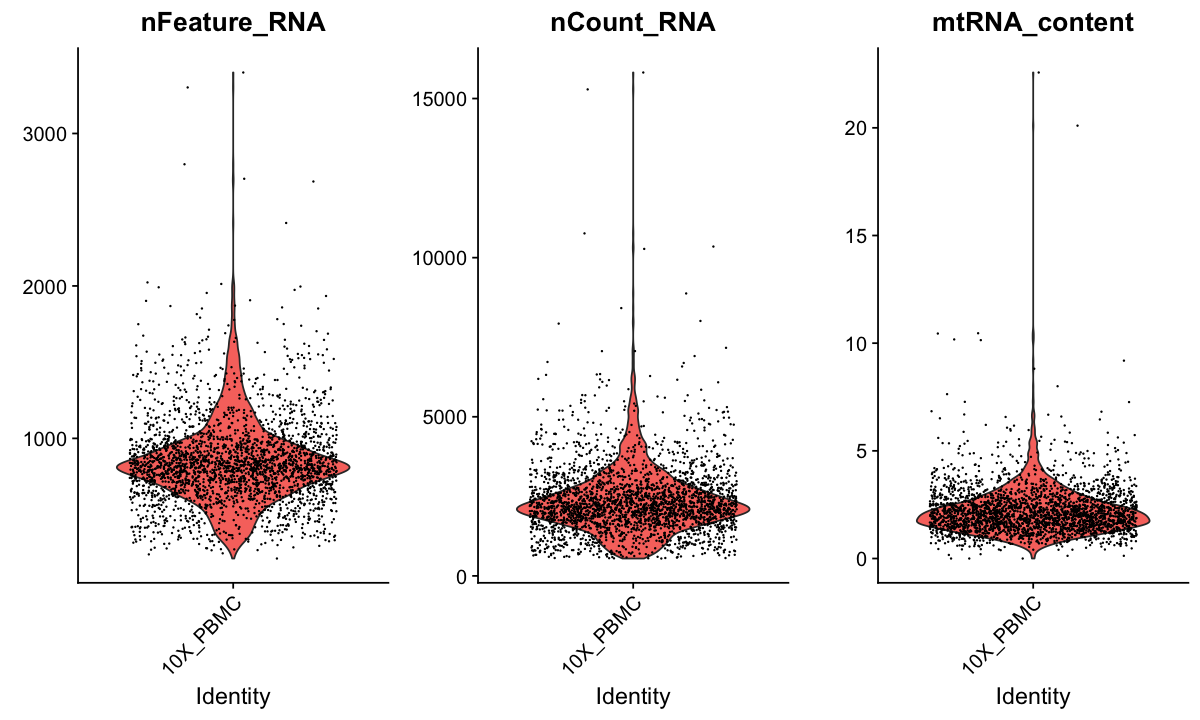

In [69]:
VlnPlot(
    object = pbmc, 
    features = c("nFeature_RNA", "nCount_RNA", "mtRNA_content"), 
    ncol = 3, 
    pt.size = 1e-2
)

# Relationships between metadata

UMIs (`nCount_RNA`) and number of genes (`nFeature_RNA`) are very correlated.

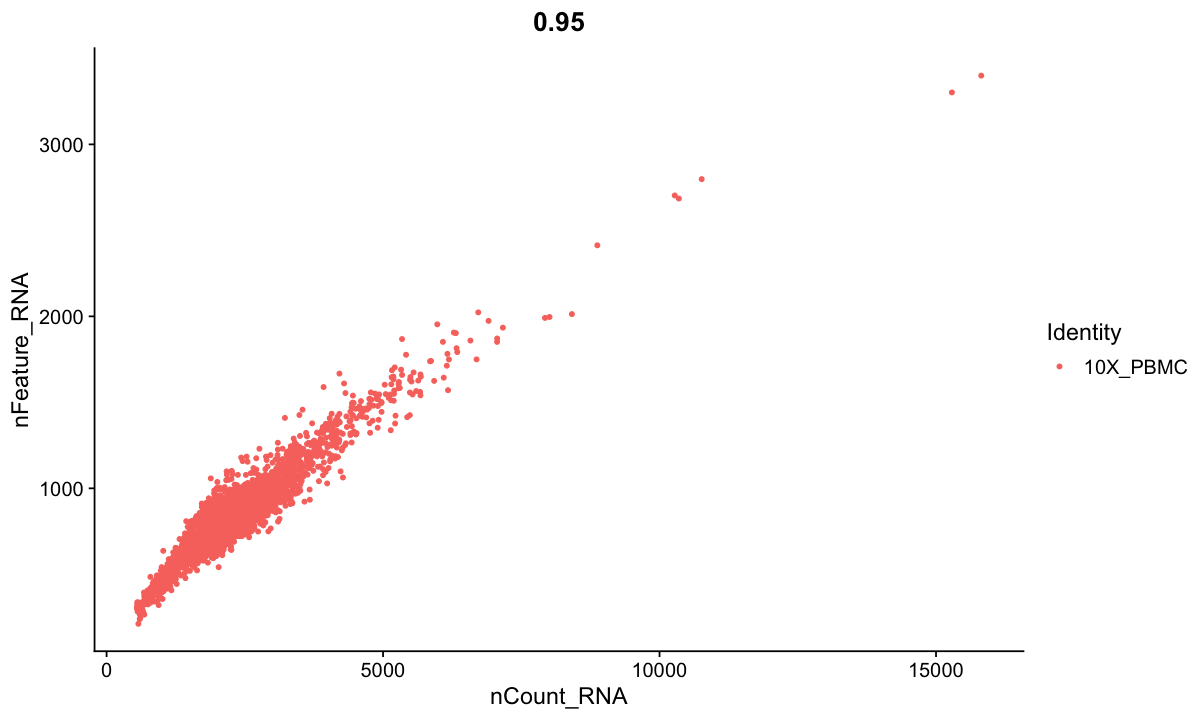

In [70]:
FeatureScatter(object = pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

If mtRNA content is an indicator of low cell quality, then we'd expect that cells with high mtRNA content (`mtRNA_content`) also express few genes.  Is this the case?

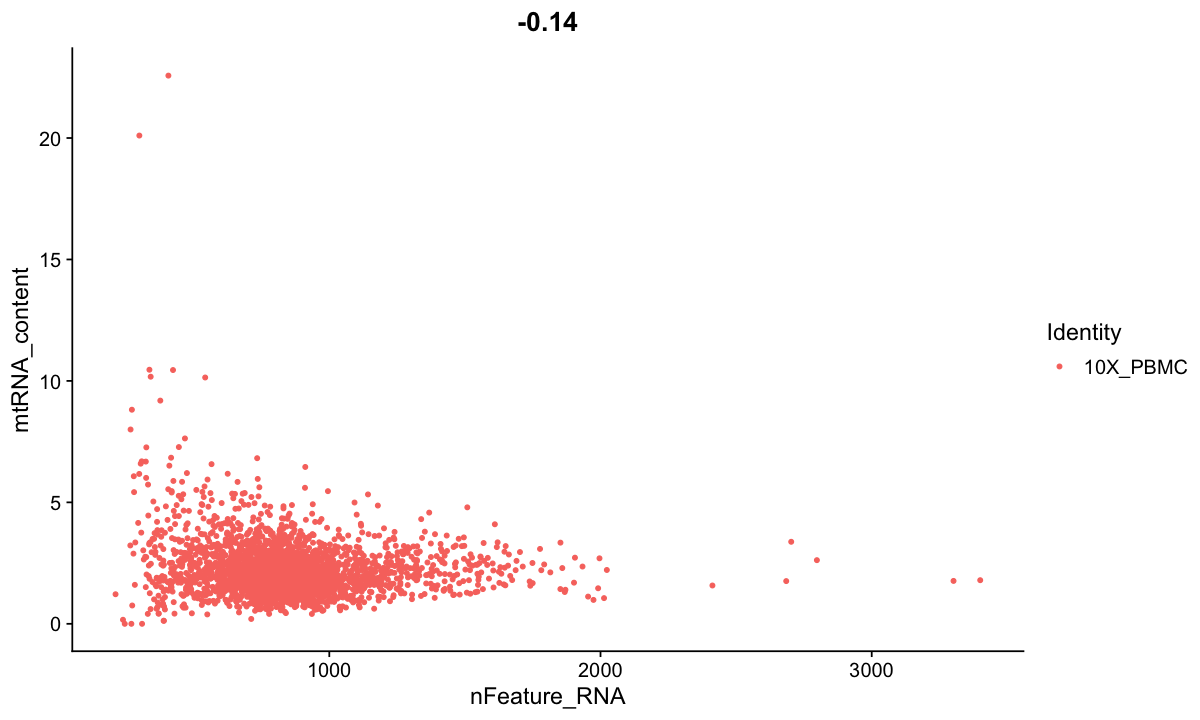

In [71]:
FeatureScatter(object = pbmc, feature1 = "nFeature_RNA", feature2 = "mtRNA_content")

# Some preliminary filtering

Based on the plots above, let's filter mtRNA content to be `<10%` and the number of genes to be between `200` and `2500`.

In [72]:
dim(pbmc)

[1] 13714  2700

In [73]:
pbmc <- subset(
    x = pbmc, 
    subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mito < 5
)

In [74]:
dim(pbmc)

[1] 13714  2638

## After filtering, we normalize
- This library size normalization uses the scaling factor `10,000` and will log-transform the data for us.

In [75]:
pbmc.10k <- NormalizeData(
    object = pbmc, 
    normalization.method = "LogNormalize"
)

Alternatively, we could use the median library size as our scaling factor.

In [76]:
median.lib.size <- median(Matrix::colSums(GetAssayData(pbmc, slot = "counts")))

In [77]:
pbmc <- NormalizeData(
    object = pbmc,
    normalization.method = "LogNormalize",
    scale.factor = median.lib.size
)

# Finding genes that are highly varying
There are two ways to select "variable" genes using dispersion.  The simplest way is to select the $N$ mostly highly dispersed genes.  In that case, we can use `selection.method = "dispersion"`:

In [78]:
pbmc <- FindVariableFeatures(
    object = pbmc, 
    selection.method = "vst", 
    nfeatures = 2000
)

Warning message:
“Transformation introduced infinite values in continuous x-axis”


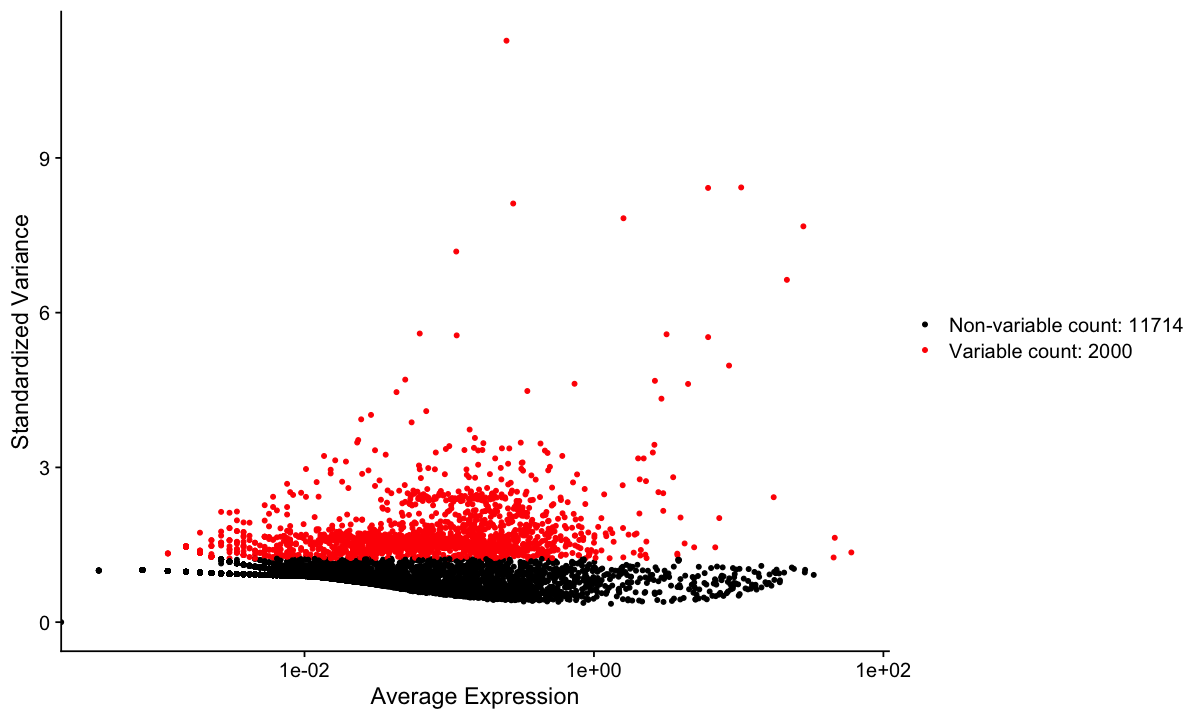

In [79]:
VariableFeaturePlot(pbmc)

Alternatively, can either plot each gene by its mean and variance, then select a region (defined by a rectangle in mean-variance space) in that plot where signature genes live.  To do this, we can specify `selection.method = "mean.var.plot"` and the cutoffs that define the rectangle:

- `mean.cutoff` = (minimum, maximum) mean expression to consider
- `dispersion.cutoff` = (minimum, maximum) dispersion to consider

In [80]:
pbmc.mv <- FindVariableFeatures(
    object = pbmc, 
    selection.method = "mean.var.plot", 
    mean.cutoff = c(0.0125, 3), 
    dispersion.cutoff = c(0.5, Inf),
)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


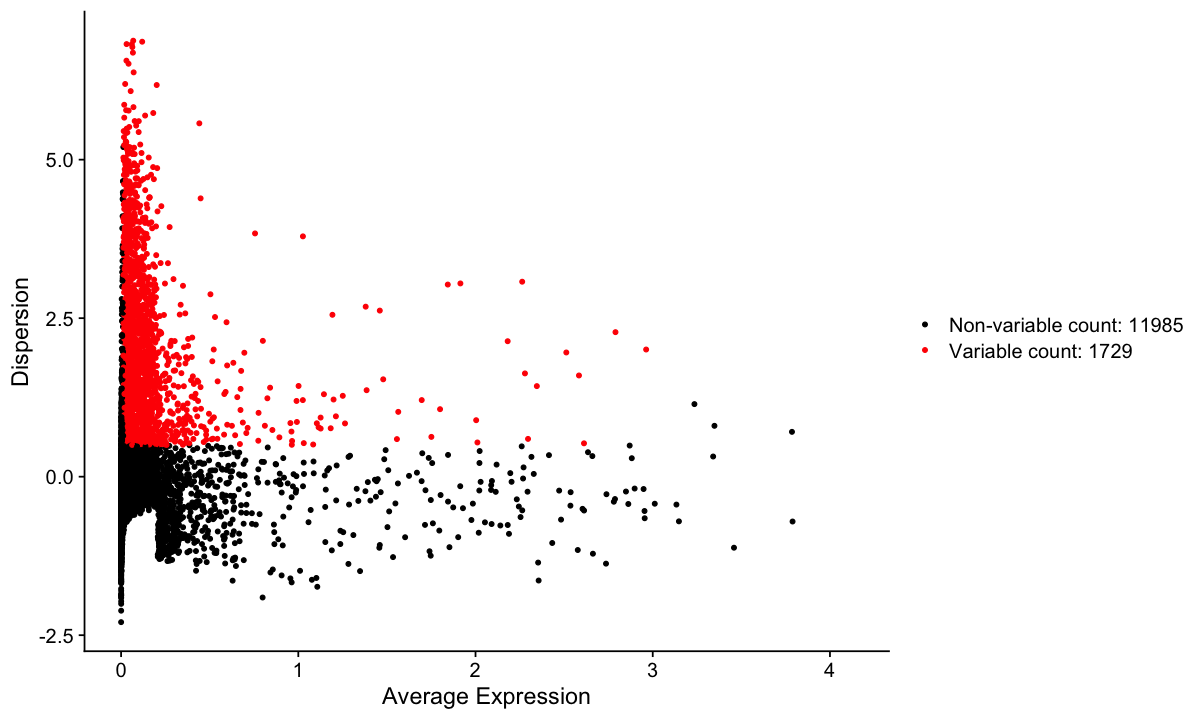

In [81]:
VariableFeaturePlot(pbmc.mv)

For either method:
- Because the expression has been log transformed, the mean expression of each gene is computed by reversing the log (through `exp`), computing the mean, then log transforming again.
- Dispersion is computed by taking the log of the ratio of variance to the mean for each gene.

# Scale the data and run PCA

In addition to scaling the data, we will also "regress out" any bias related to the percentage of mtRNA or UMI count per cell.  

**_WARNING_**: Scaling is pretty quick, but regression takes a few minutes.

In [82]:
pbmc <- ScaleData(
    object = pbmc, 
    features = rownames(x = pbmc), 
    #vars.to.regress = "percent.mt"
)

Centering and scaling data matrix



In [83]:
pbmc <- RunPCA(
    object = pbmc, 
    features = VariableFeatures(object = pbmc), 
    verbose = FALSE
)

What genes are important for our first few PCs?

In [84]:
print(
    x = pbmc[['pca']], 
    dims = 1:5, 
    nfeatures = 5, 
    projected = FALSE
)

PC_ 1 
Positive:  CST3, TYROBP, FTL, LYZ, AIF1 
Negative:  MALAT1, LTB, IL32, IL7R, B2M 
PC_ 2 
Positive:  CD79A, MS4A1, HLA-DQA1, HLA-DQB1, HLA-DRA 
Negative:  NKG7, PRF1, GZMB, CST7, GZMA 
PC_ 3 
Positive:  CD74, HLA-DPA1, HLA-DPB1, HLA-DQA1, CD79B 
Negative:  PPBP, PF4, SDPR, NRGN, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD74, CD79A, HLA-DQB1 
Negative:  VIM, IL7R, IL32, GIMAP7, S100A6 
PC_ 5 
Positive:  MS4A7, CKB, FCGR3A, RP11-290F20.3, RHOC 
Negative:  S100A8, S100A9, LGALS2, CD14, MS4A6A 


Just from this, it looks like PC1 separates dendritic cells from T cells, and PC2 separates Natural Killer cells from B cells.

# How do we visualize our PCA results?

How do particular genes contribute to each PC?

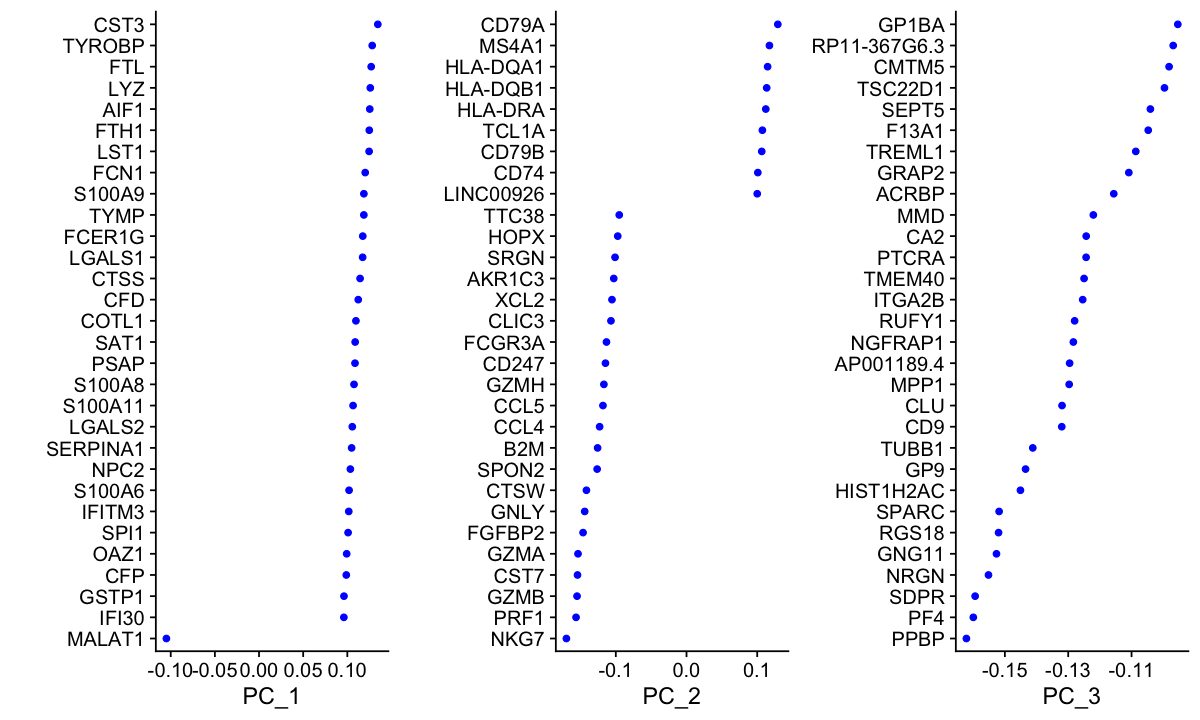

In [85]:
VizDimLoadings(object = pbmc, dims = 1:3, ncol = 3)

Or we can just plot PC1 vs PC2:

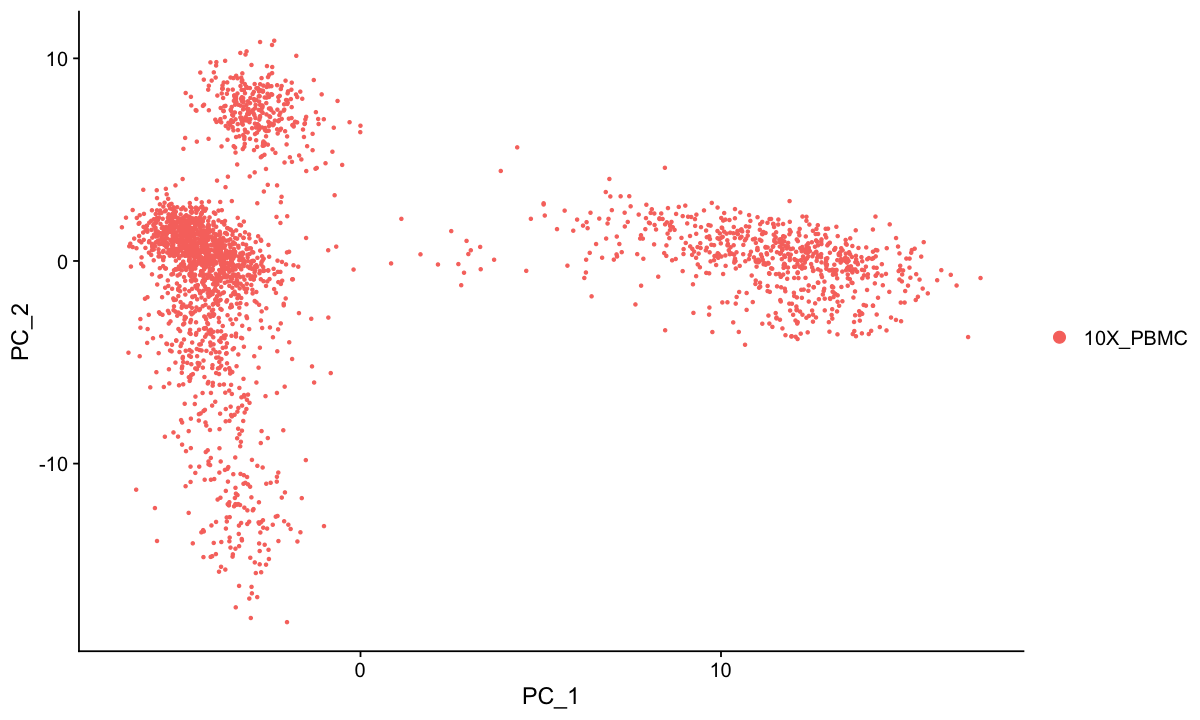

In [86]:
DimPlot(object = pbmc, )

# How do we know how many PCs are important?

If we plot the standard deviations of each PC, we can look for a cutoff after which additional PCs don't contribute much.

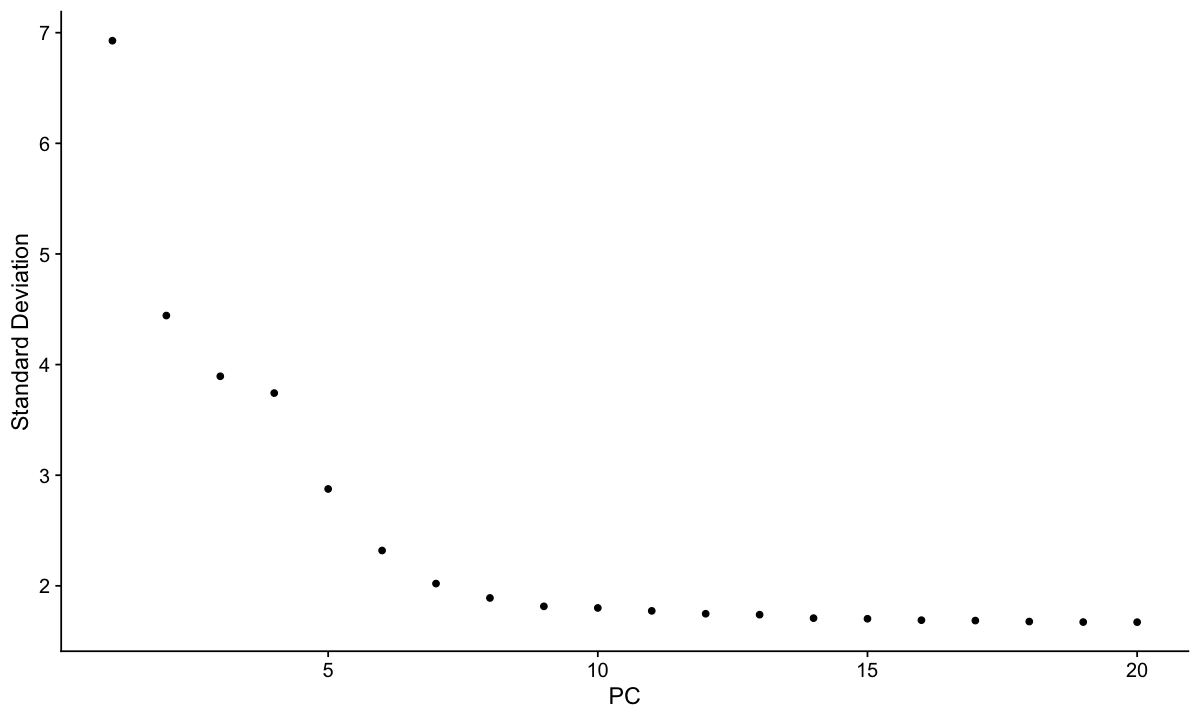

In [87]:
ElbowPlot(object = pbmc)

Here it looks like the first 4 are really important, and after about 10 PCs contributions start to die off.

# More systematically, we can compute the "jackstraws"

This randomly permutes genes and computes PCA on the permuted genes.  When compared to the real PCs, we can get a sense for significant our PCs are.
- Below we can see that the first 10-11 PCs (solid-ish lines) have enriched signal over the randomized threshold (dotted lines).
- **_Careful_**, this takes a few minutes to compute.

In [88]:
# Compute the jackstraws
pbmc <- JackStraw(object = pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(object = pbmc, dims = 1:15)

Warning message:
“Removed 23291 rows containing missing values (geom_point).”


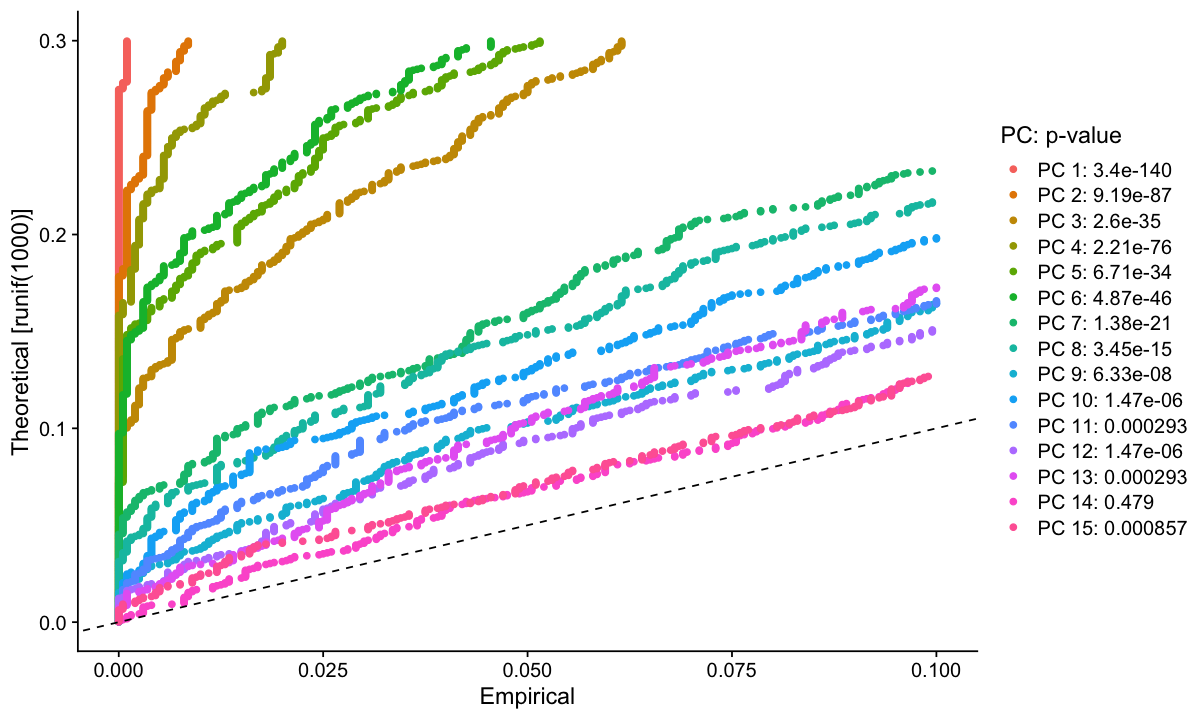

In [89]:
JackStrawPlot(object = pbmc, dims = 1:15)

# Now that we've compute PCA, we can build a nearest neighbor graph and find clusters

Two things to note here:
1. we're using the PCs to compute the graph, but we could use any reduction type.
2. `FindClusters` finds "communities" given a certain `resolution` parameter.  Higher resolutions lead to more, smaller clusters and lower resolutions lead to fewer but larger clusters.  Typical values are `0.32 - 1`.

In [ ]:
pbmc <- FindNeighbors(object = pbmc, dims = 1:10)
pbmc <- FindClusters(object = pbmc, resolution = 0.6)

# Let's visualize these clusters in a low dimensional embedding with t-SNE

In [91]:
pbmc <- RunTSNE(object = pbmc, dims = 1:10)

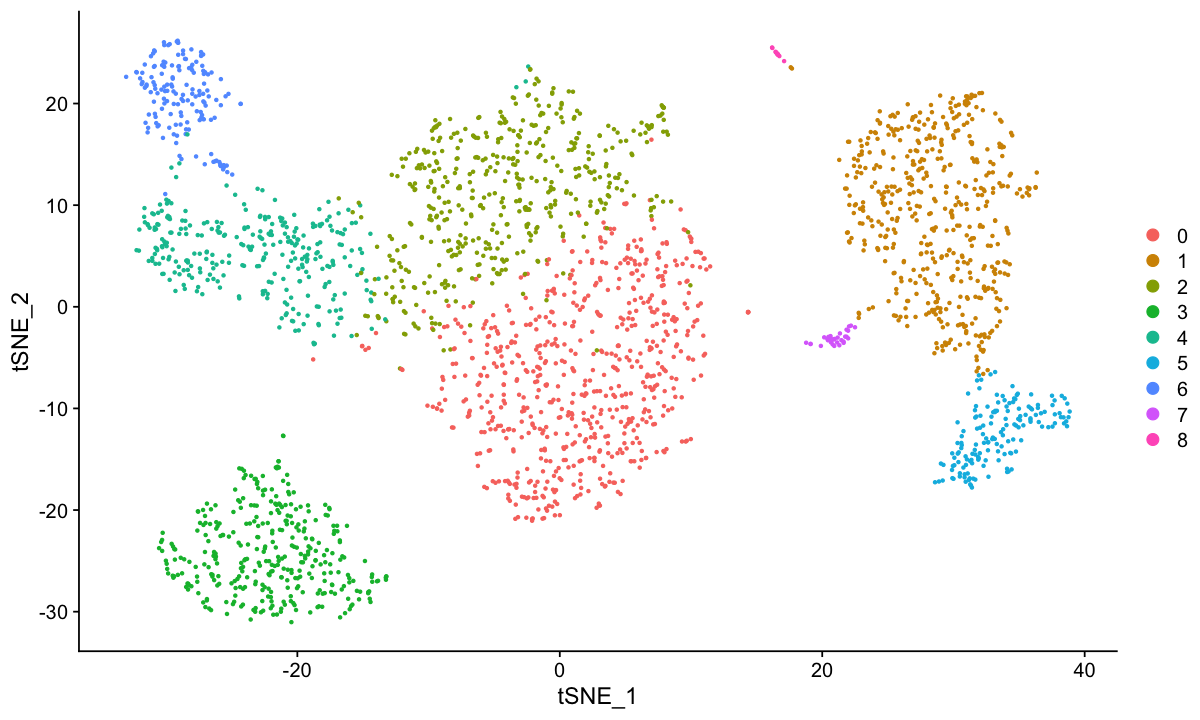

In [92]:
DimPlot(object = pbmc, reduction = "tsne")

# Alternatively, let's use UMAP

In [ ]:
pbmc <- RunUMAP(object = pbmc, dims=1:10)

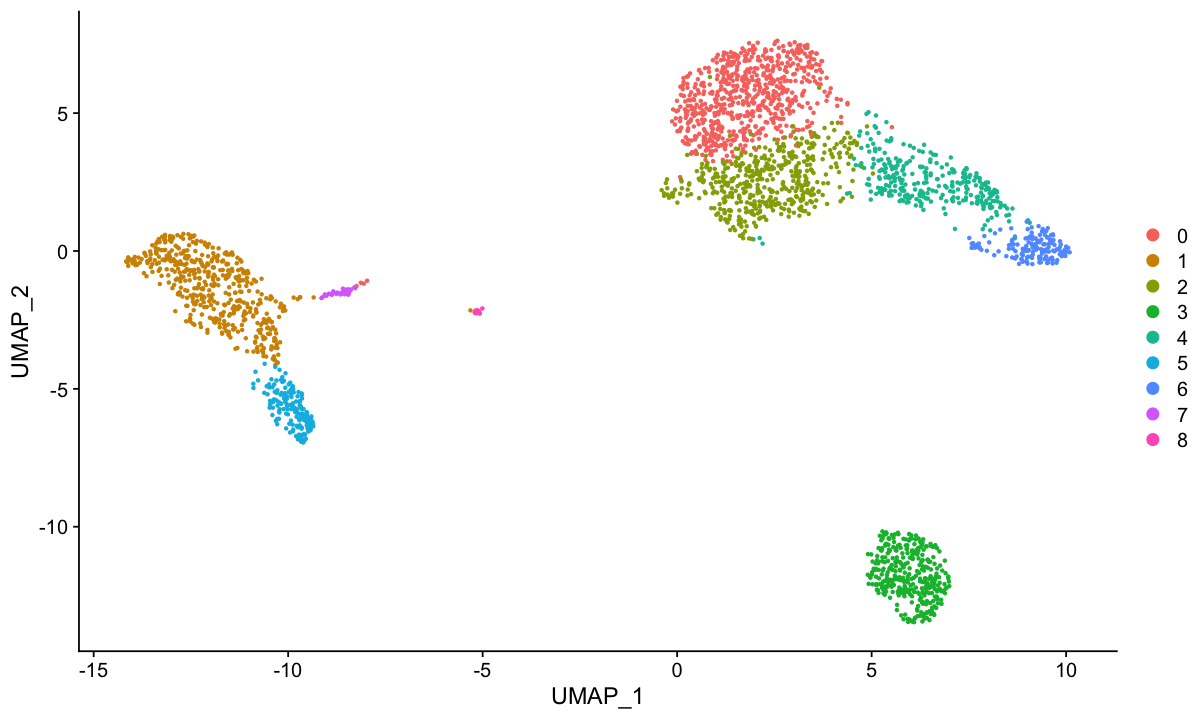

In [94]:
DimPlot(object = pbmc, reduction = "umap")

# Finding markers

This will take a few minutes.
- `only.pos = TRUE` selects only genes that are enriched in each cluster
- `min.pct = 0.25` limits the testing to genes expressed in at least 25% of cells of each cluster
- `logfc.threshold = 0.25` limits the testing to genes with log fold change (logfc) greater than 0.25.

In [ ]:
pbmc.markers <- FindAllMarkers(
    object = pbmc, 
    only.pos = TRUE, 
    min.pct = 0.25, 
    logfc.threshold = 0.25
)

In [96]:
suppressPackageStartupMessages(library(dplyr))
# this is some tidyverse magic to select the top 2 genes from each cluster
pbmc.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.255929e-118,0.5678495,0.930,0.589,1.722381e-114,0,LDHB
2.291434e-117,0.5333700,0.999,0.975,3.142472e-113,0,RPS3A
0.000000e+00,3.0828090,0.996,0.214,0.000000e+00,1,S100A9
4.102371e-270,2.8133709,1.000,0.516,5.625992e-266,1,LYZ
3.612157e-99,0.7100994,0.950,0.464,4.953712e-95,2,IL32
5.719918e-87,0.7674060,0.979,0.643,7.844296e-83,2,LTB
0.000000e+00,1.7494454,0.936,0.041,0.000000e+00,3,CD79A
5.255736e-185,1.8833636,1.000,0.821,7.207717e-181,3,CD74
6.034271e-213,1.7833536,0.987,0.230,8.275399e-209,4,CCL5


# Many ways to plot our top genes

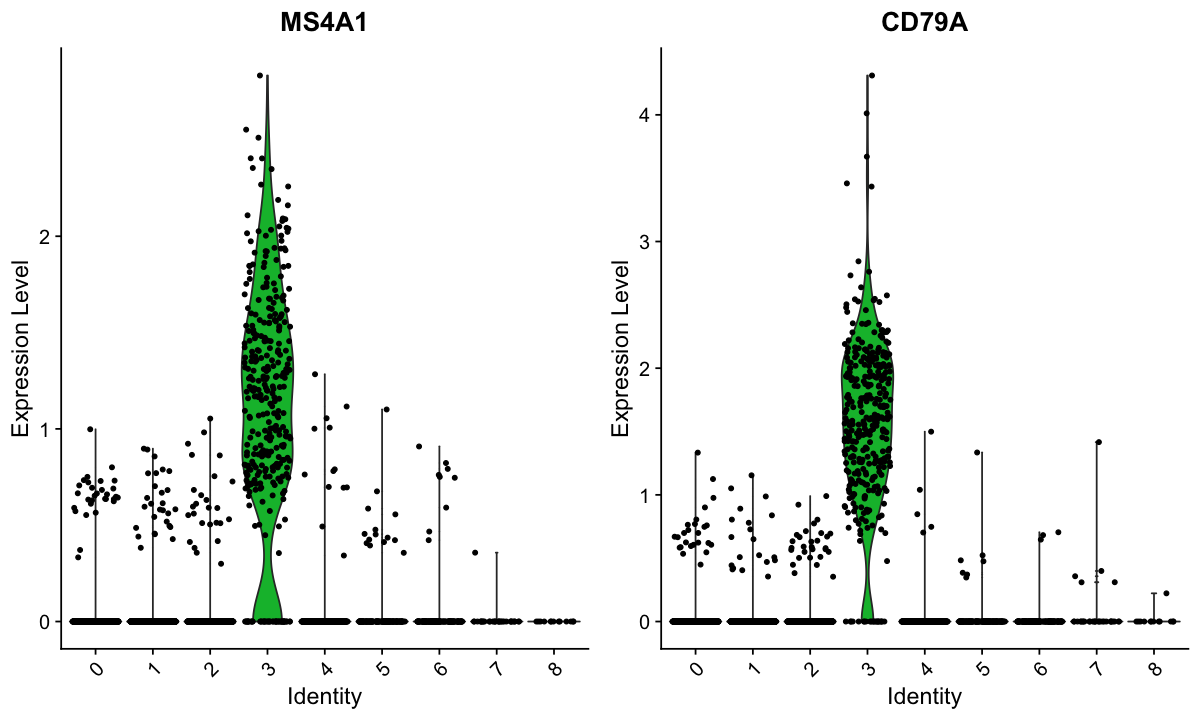

In [97]:
VlnPlot(object = pbmc, features = c("MS4A1", "CD79A"))

Those are our B cells!

In [98]:
saved <- options(repr.plot.width=8, repr.plot.height=6)

The following functions and any applicable methods accept the dots: plot_grid



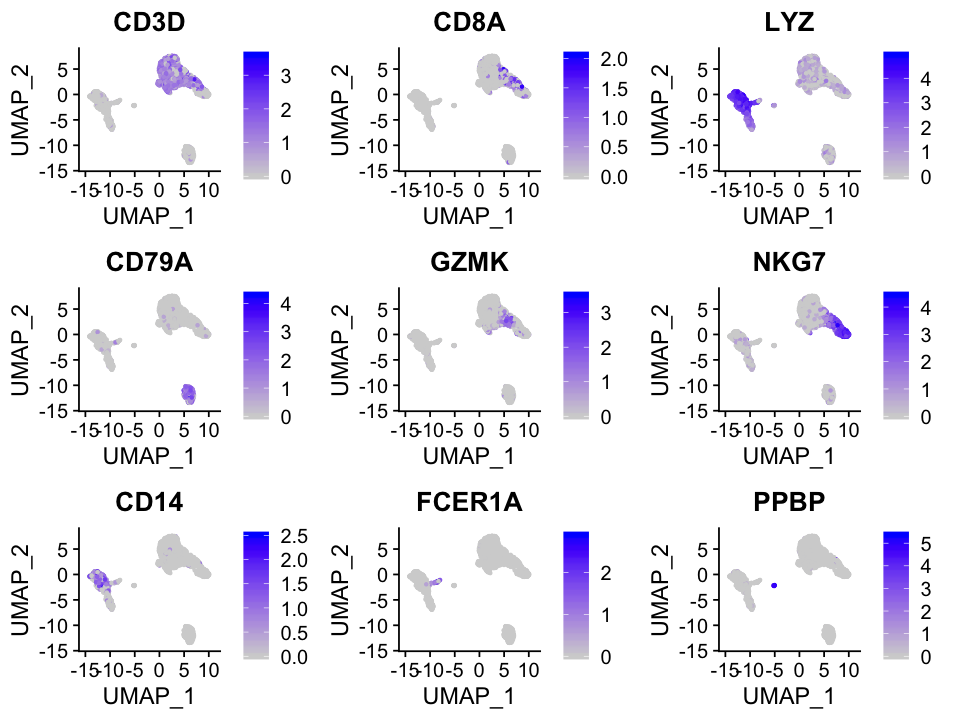

In [99]:
top.genes <- c(
  "CD3D", # CD4 T cells
  "CD8A", # CD8 T cells
  "LYZ", # Monocytes
  "CD79A", # B cells
  "GZMK", # Gamma/Delta T cells
  "NKG7", # NK cells
  "CD14", # CD14+ Monocyte
  "FCER1A", # Classical DC
  "PPBP" # Platlets
)
FeaturePlot(object = pbmc, features = top.genes)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



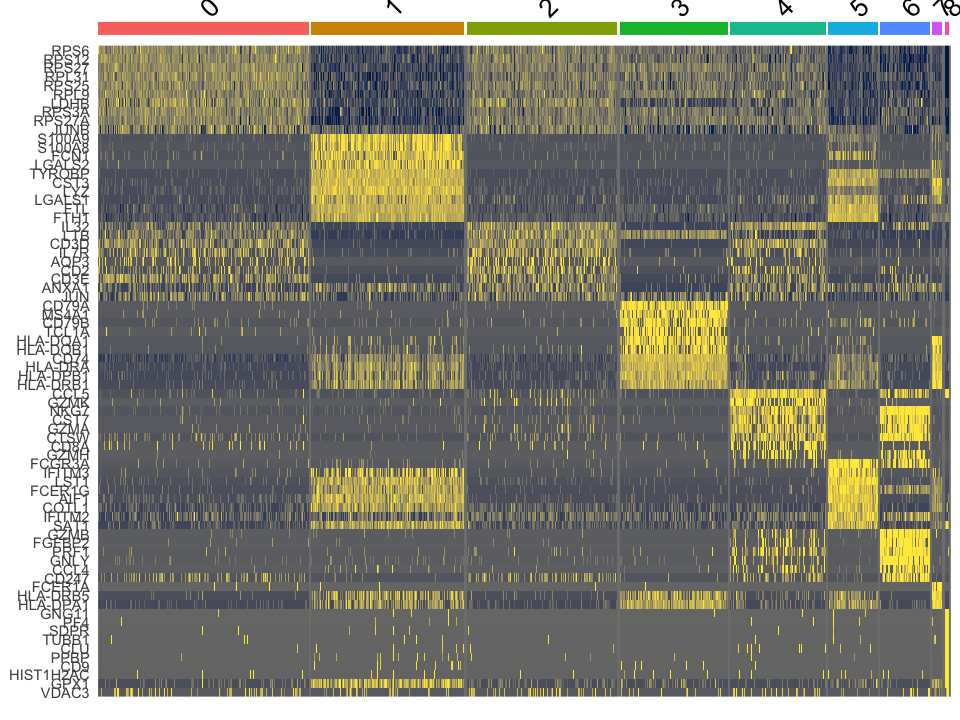

In [100]:
# this is some tidyverse magic to select the top 10 markers from each cluster
pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC) -> top10
DoHeatmap(object = pbmc, features = top10$gene) + NoLegend() + 
    ggplot2::scale_fill_gradientn(colors = viridisLite::cividis(256))

In [101]:
options(saved)

# Let's make our publication ready plot with cell populations labeled

After visualizing our clusters and attempting to identify them through our biological knowledge, asking colleagues, or looking up genes in a [database](http://bio-bigdata.hrbmu.edu.cn/CellMarker/) (or Google!), we can make these labels part of the Seurat object.

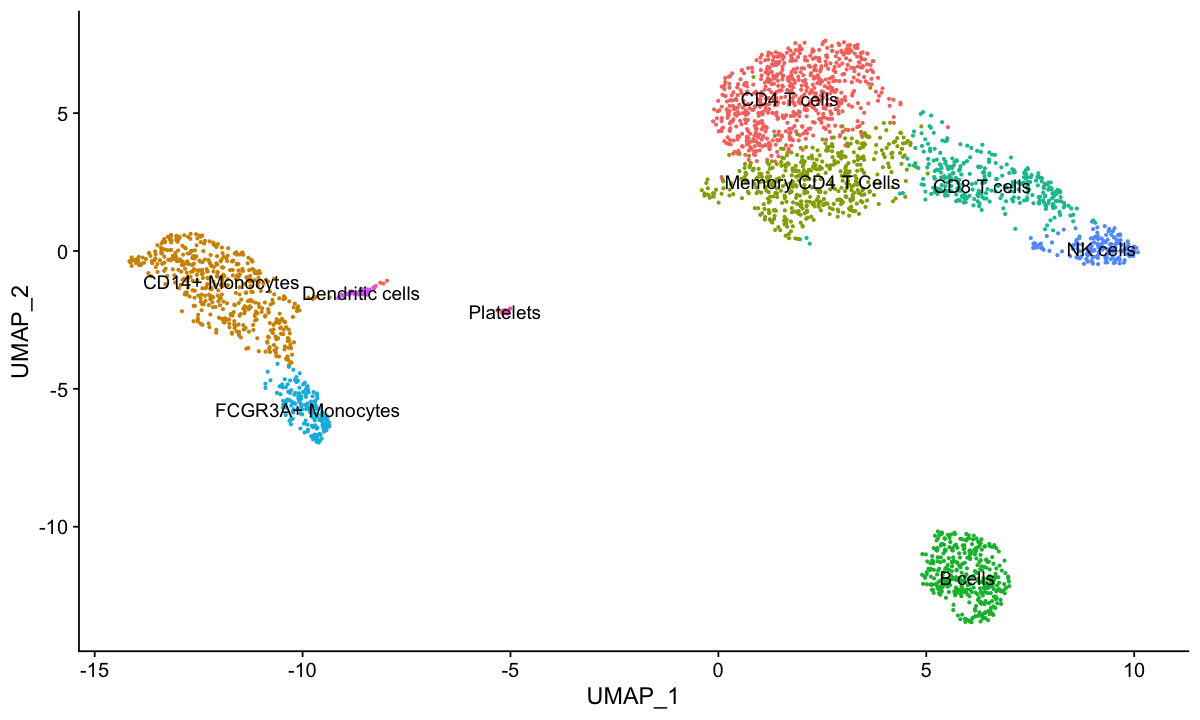

In [102]:
new.cluster.ids <- c(
    "CD4 T cells", "CD14+ Monocytes", "Memory CD4 T Cells", "B cells", "CD8 T cells", 
    "FCGR3A+ Monocytes", "NK cells", "Dendritic cells", "Platelets"
)
names(x = new.cluster.ids) <- levels(x = pbmc)
pbmc <- RenameIdents(object = pbmc, new.cluster.ids)
DimPlot(object = pbmc, reduction = 'umap', label = TRUE, pt.size = 0.5) + NoLegend()

# Questions, comments

Email me: <a href="mailto:bill.flynn@jax.org">bill.flynn@jax.org</a>

In [1]:
import squidpy as sq
import scanpy as sc

In [ ]:
vis1 = "../da"

In [2]:
import matplotlib.pyplot as plt

In [3]:
from io import StringIO

In [17]:
import numpy as np

In [18]:
df = pd.read_table(raw_data, header=None)
df.columns = ["tapestation", "qubit", "qpcr"]

In [21]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [23]:
df.dropna(inplace=True)

In [24]:
df

,tapestation,qubit,qpcr
0,10.43,14.18,20.48
1,11.24,15.09,23.66
3,7.07,14.77,17.71
5,11.82,14.64,17.27
6,8.21,13.43,14.83
...,...,...,...
719,70.48,62.82,99.29
720,93.42,82.17,135.01
721,98.69,75.09,160.32
722,89.52,74.29,76.58


,tapestation,qubit,qpcr
tapestation,1.000000,0.568149,0.471428
qubit,0.568149,1.000000,0.778201
qpcr,0.471428,0.778201,1.000000
